In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly
import plotly.offline as py
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
%matplotlib inline

# 1. Data Cleaning and Processing

In [2]:
# Reading the data 
df = pd.read_csv("../BiotechEfSet.csv")

# Dropping the unnecessary columns
df.drop('Unnamed: 0', axis=1, inplace=True)

# Sorting the data by CEFR level
df.sort_values(by=['CEFR_level'], inplace=True)

# Calculate the percentage of students who scored in each range
df['EF_Score_range'] = pd.cut(df['EF_Score'], bins=[0, 50, 70, 100], labels=['0-50', '51-70', '71-100'])

# Calculate the percentage of students who scored in each range
df['EF_Score_range_pct'] = df['EF_Score'].apply(lambda x: pd.cut(np.ravel(x), bins=[0, 50, 70, 100]).value_counts()[1] / len(df) * 100)

# Resetting the index
df.set_index("Name",inplace=True)

In [3]:
df

,EF_Score,CEFR_level,Listening_score,Listening_scale,Reading_score,Reading_scale,EF_Score_range,EF_Score_range_pct
Name,,,,,,,,
karthik p,30,A1,28,A1,32,A2,0-50,3.333333
Rashmitha V,37,A2,44,B1,30,A1,0-50,3.333333
Theevika K Theevika K,32,A2,28,A1,35,A2,0-50,3.333333
DHIVYA GOMATHI,38,A2,46,B1,30,A1,0-50,3.333333
NITHYA R,47,B1,37,A2,57,B2,0-50,3.333333
Rajalakshmi Ponraj,49,B1,44,B1,53,B2,0-50,3.333333
Harini k,46,B1,44,B1,48,B1,0-50,3.333333
Keerthana Arumugam,47,B1,46,B1,47,B1,0-50,3.333333
SWATHI V SWATHI V,50,B1,43,B1,57,B2,0-50,3.333333


In [4]:
# Getting the percentage of each CEFR level in the population
perc = round((df['CEFR_level'].value_counts()/len(df))*100,2)

# Lets create a Series object with the index as the CEFR levels and the values as the percentage
cefr = pd.Series(perc.values, index=perc.index)

# Rename the column names to Score %
cefr.rename('Score %', inplace=True)
cefr.sort_values(ascending=True, inplace=True)
cefr

CEFR_level
A1     3.33
A2    10.00
C2    10.00
B1    16.67
B2    20.00
C1    40.00
Name: Score %, dtype: float64

In [5]:
df.columns

Index(['EF_Score', 'CEFR_level', 'Listening_score', 'Listening_scale',
       'Reading_score', 'Reading_scale', 'EF_Score_range',
       'EF_Score_range_pct'],
      dtype='object')

In [6]:
df[df['CEFR_level']=="C2"]

,EF_Score,CEFR_level,Listening_score,Listening_scale,Reading_score,Reading_scale,EF_Score_range,EF_Score_range_pct
Name,,,,,,,,
JOSELIN REINA J,71,C2,68,C1,73,C2,71-100,0.0
Jayashri B.S,72,C2,68,C1,75,C2,71-100,0.0
Bernita Celas C,72,C2,72,C2,72,C2,71-100,0.0


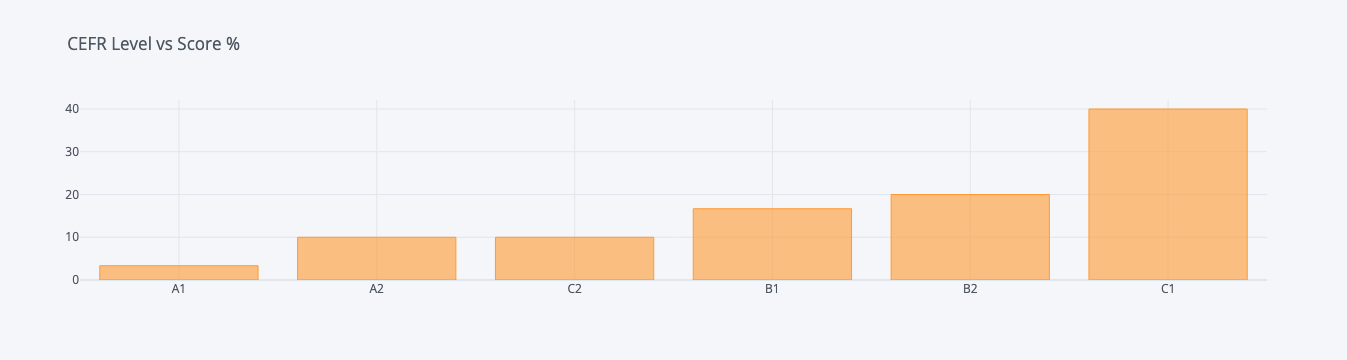

In [7]:
# Plotting interactive plots with plotly
cefr.iplot(kind='bar', title='CEFR Level vs Score %')


<Axes: xlabel='CEFR_level', ylabel='count'>

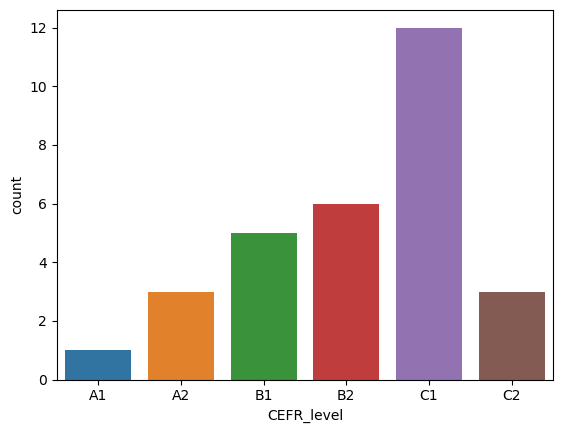

In [8]:
sns.countplot(x='CEFR_level', data=df)

In [9]:
# Finding the average of each CEFR level
cefr_ef_mean = df.groupby('CEFR_level')['EF_Score'].mean()
cefr_ef_mean

CEFR_level
A1    30.000000
A2    35.666667
B1    47.800000
B2    55.833333
C1    64.666667
C2    71.666667
Name: EF_Score, dtype: float64

<Axes: xlabel='CEFR_level', ylabel='EF_Score'>

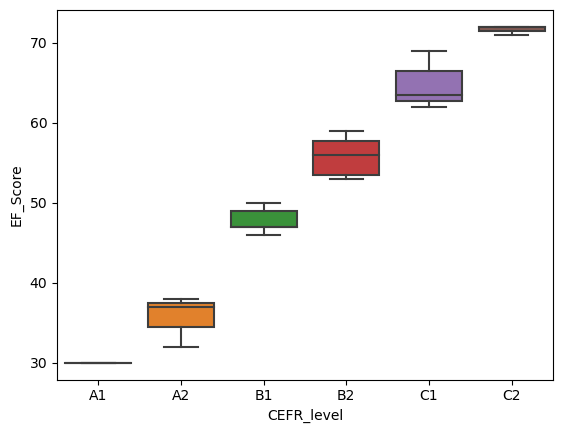

In [10]:
# Plotting the boxplot for each CEFR level
sns.boxplot(x='CEFR_level', y='EF_Score', data=df)

In [11]:
df.columns

Index(['EF_Score', 'CEFR_level', 'Listening_score', 'Listening_scale',
       'Reading_score', 'Reading_scale', 'EF_Score_range',
       'EF_Score_range_pct'],
      dtype='object')

/Users/kausik/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



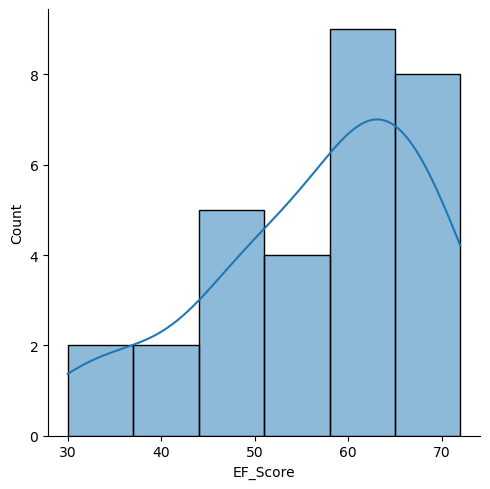

In [12]:
# Plotting the distribution of the EF_Score
sns.displot(df['EF_Score'], kde=True)

Text(0.5, 1.0, 'Statistical Measures for each CEFR Level')

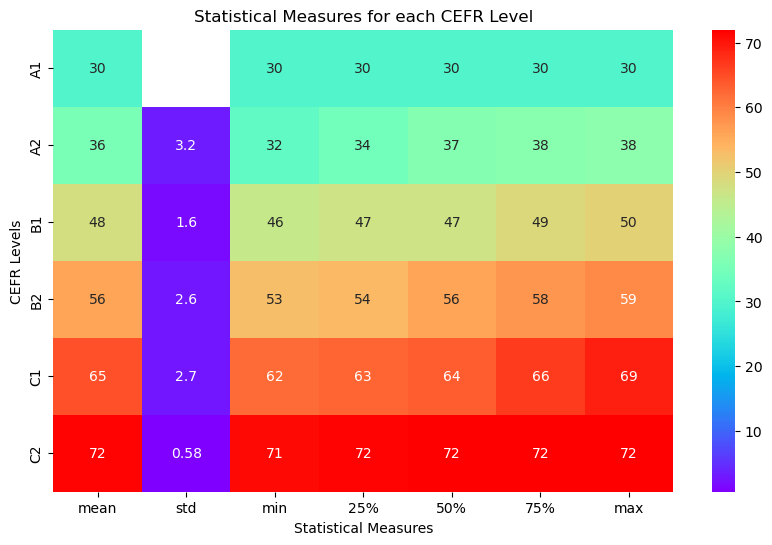

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.groupby('CEFR_level')['EF_Score'].describe()[['mean','std','min','25%','50%','75%','max']],annot=True,cmap='rainbow',alpha=1.0)
plt.xlabel("Statistical Measures")
plt.ylabel("CEFR Levels")
plt.title("Statistical Measures for each CEFR Level")

Text(0, 0.5, 'EF Score')

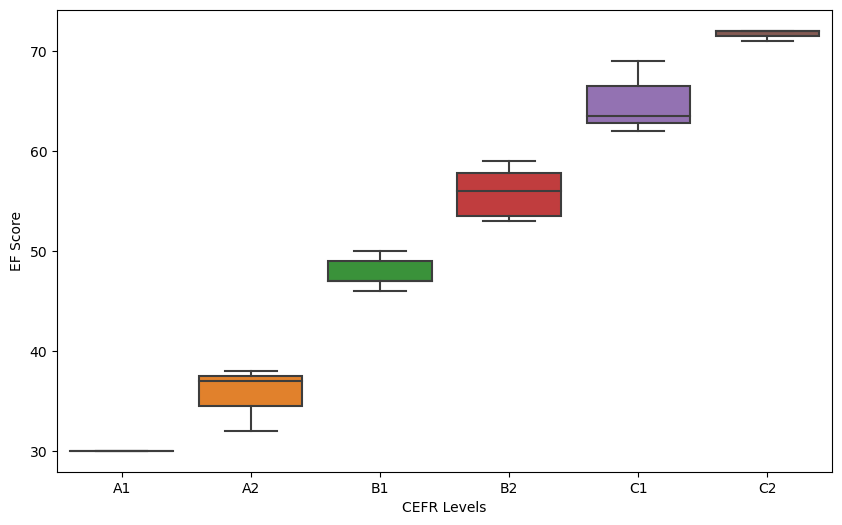

In [14]:
# Plotting the distribution of the EF_Score for each CEFR level
plt.figure(figsize=(10,6))
sns.boxplot(x='CEFR_level', y='EF_Score', data=df)
plt.xlabel("CEFR Levels")
plt.ylabel("EF Score")

Text(0, 0.5, 'EF Score')

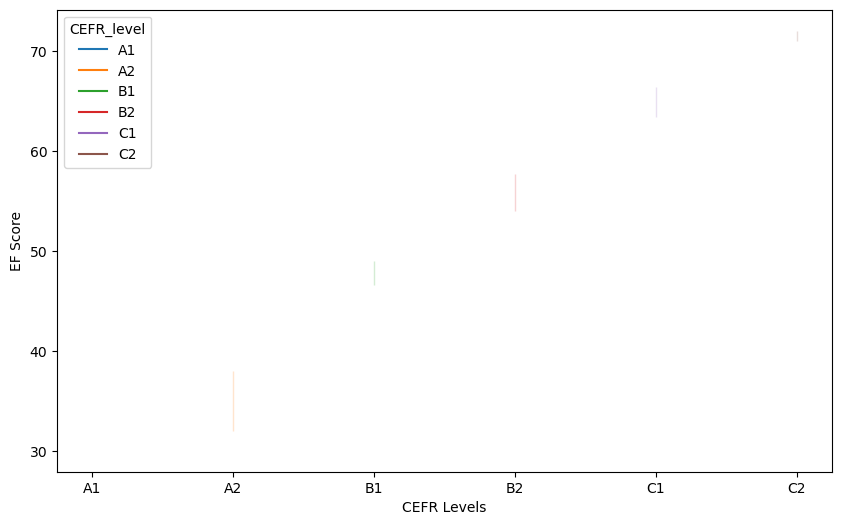

In [15]:
# Plotting the distrinution of the EF_Score with respect to the CEFR level on a line plot
# Let's plot a line plot wheere each CEFR Level is a line having a seperate color
plt.figure(figsize=(10,6))
sns.lineplot(x='CEFR_level', y='EF_Score', data=df, hue='CEFR_level')
plt.xlabel("CEFR Levels")
plt.ylabel("EF Score")


In [ ]:
df.columns

<Axes: xlabel='Listening_score', ylabel='count'>

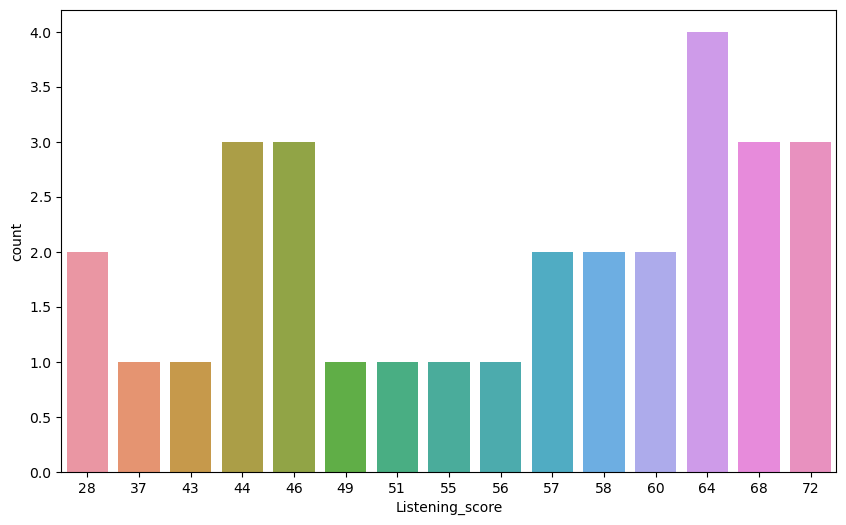

In [18]:
# Plotting the distribution of Listening Score with the listening scale 
plt.figure(figsize=(10,6))
sns.countplot(x='Listening_score', data=df)

<Axes: >

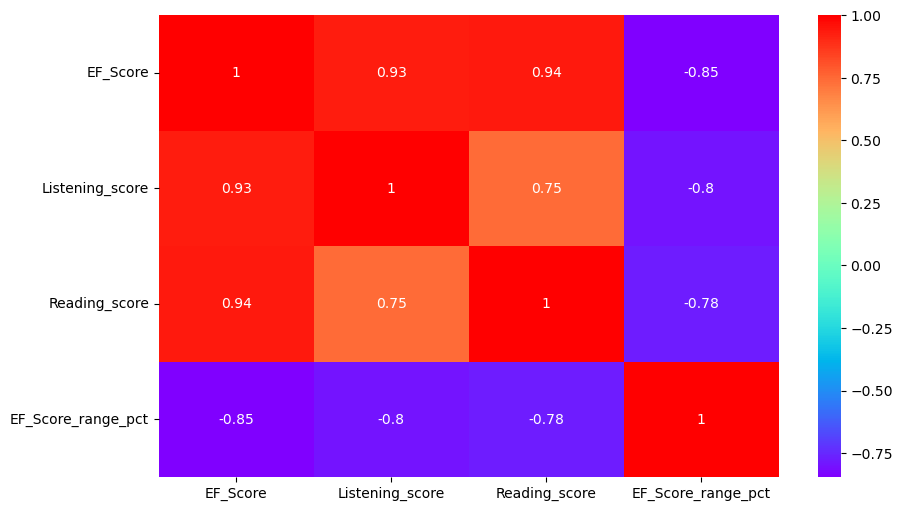

In [19]:
# Lets plot a heatmap for the correlation between the different columns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='rainbow', alpha=1.0)

In [20]:
df.columns

Index(['EF_Score', 'CEFR_level', 'Listening_score', 'Listening_scale',
       'Reading_score', 'Reading_scale', 'EF_Score_range',
       'EF_Score_range_pct'],
      dtype='object')

/Users/kausik/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x600 with 0 Axes>

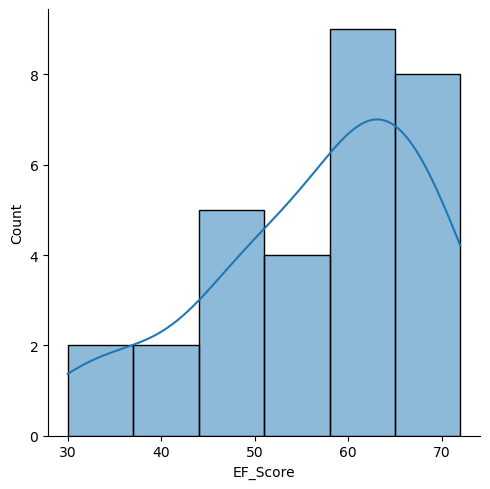

In [21]:
# Lets plot a distribution plot between the EF_Score and the Listening Score
plt.figure(figsize=(10,6))
sns.displot(x=df["EF_Score"], kde=True)

/Users/kausik/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



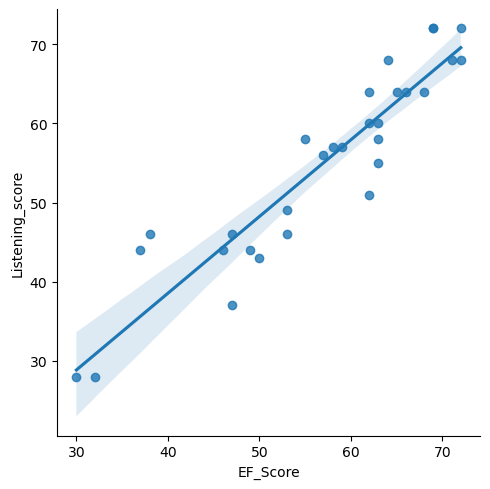

In [22]:
sns.lmplot(x='EF_Score', y='Listening_score', data=df)

/Users/kausik/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x600 with 0 Axes>

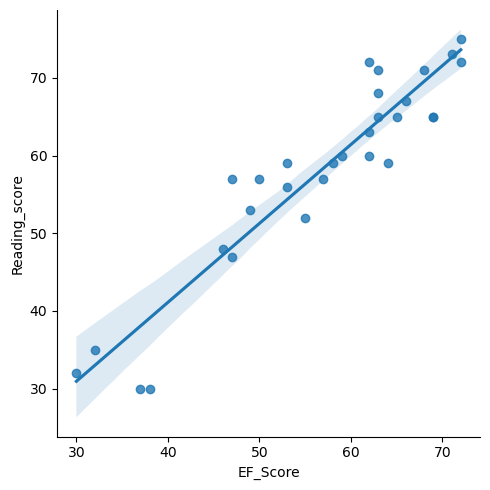

In [23]:
# Lets plot a distribution plot between the EF_Score and the Reading Score
plt.figure(figsize=(10,6))
sns.lmplot(x='EF_Score', y='Reading_score', data=df)

In [26]:
c2 = df[df["CEFR_level"]=="C2"]
c2

,EF_Score,CEFR_level,Listening_score,Listening_scale,Reading_score,Reading_scale,EF_Score_range,EF_Score_range_pct
Name,,,,,,,,
JOSELIN REINA J,71,C2,68,C1,73,C2,71-100,0.0
Jayashri B.S,72,C2,68,C1,75,C2,71-100,0.0
Bernita Celas C,72,C2,72,C2,72,C2,71-100,0.0


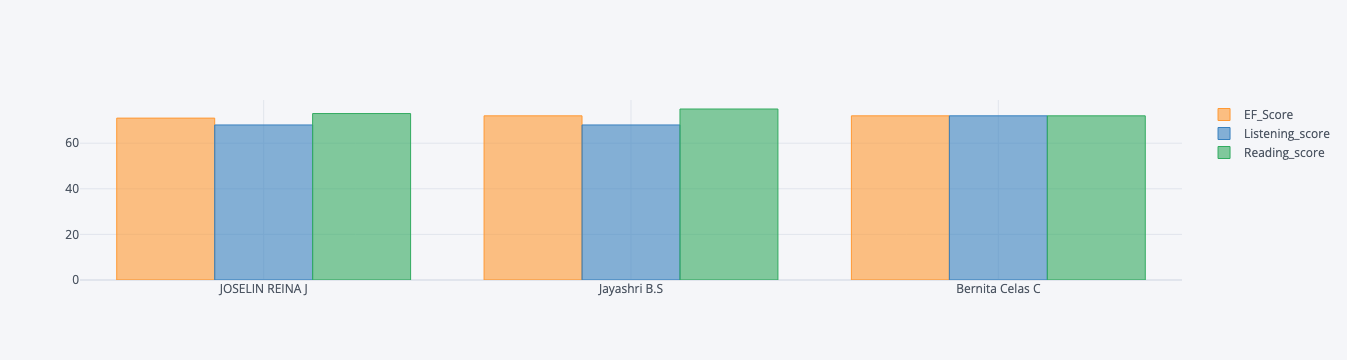

<Figure size 1000x800 with 0 Axes>

In [27]:
fig = plt.figure(figsize=(10,8))
c2[['EF_Score',"Listening_score","Reading_score"]].iplot(kind='bar')
plt.tight_layout()

In [29]:
c1 = df[df["CEFR_level"]=="C1"]
c1

,EF_Score,CEFR_level,Listening_score,Listening_scale,Reading_score,Reading_scale,EF_Score_range,EF_Score_range_pct
Name,,,,,,,,
Subashni S,69,C1,72,C2,65,C1,51-70,0.0
SHANGAMITHRA S,62,C1,64,C1,60,B2,51-70,0.0
Sashmitha Marian,66,C1,64,C1,67,C1,51-70,0.0
Thomas Santhoshni,65,C1,64,C1,65,C1,51-70,0.0
Advika J,63,C1,55,B2,71,C2,51-70,0.0
Yazhini A,69,C1,72,C2,65,C1,51-70,0.0
karthik s,68,C1,64,C1,71,C2,51-70,0.0
Ferlinsa Max,62,C1,51,B2,72,C2,51-70,0.0
BHAVASRI S,62,C1,60,B2,63,C1,51-70,0.0


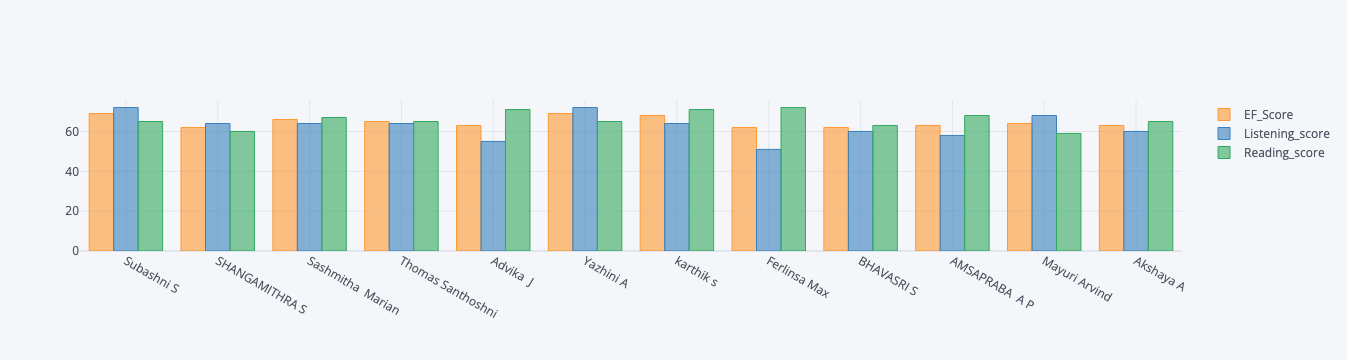

<Figure size 640x480 with 0 Axes>

In [30]:
c1[["EF_Score","Listening_score","Reading_score"]].iplot(kind="bar")
plt.tight_layout()

In [31]:
pd.DataFrame(df['CEFR_level'].value_counts()).sort_values(by="CEFR_level")

,count
CEFR_level,
A1,1
A2,3
B1,5
B2,6
C1,12
C2,3


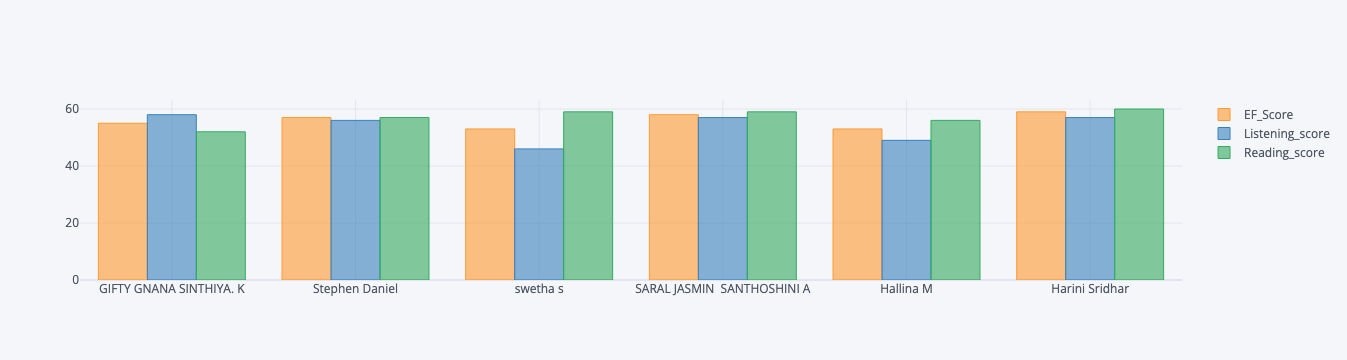

In [33]:
b2 = df[df["CEFR_level"]=="B2"]
b2[['EF_Score','Listening_score','Reading_score']].iplot(kind="bar")

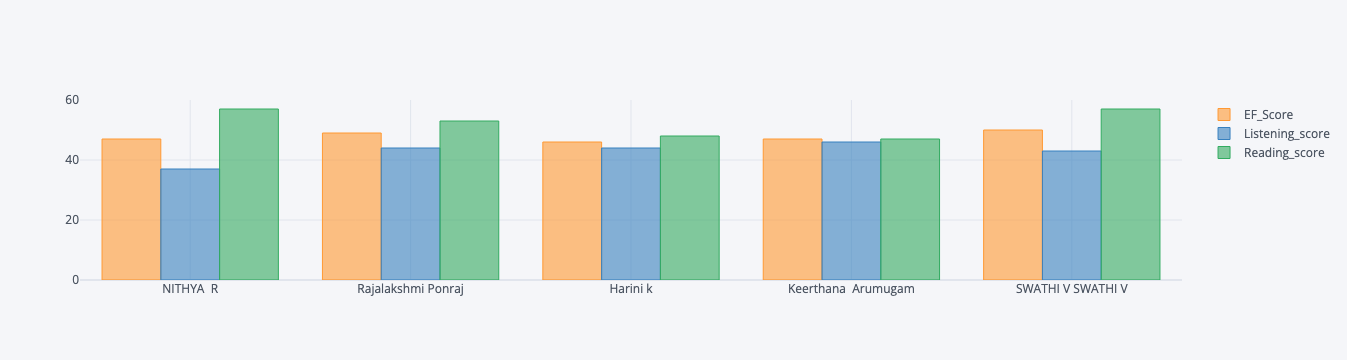

In [35]:
b1 = df[df["CEFR_level"]=="B1"]
b1[["EF_Score","Listening_score","Reading_score"]].iplot(kind="bar")

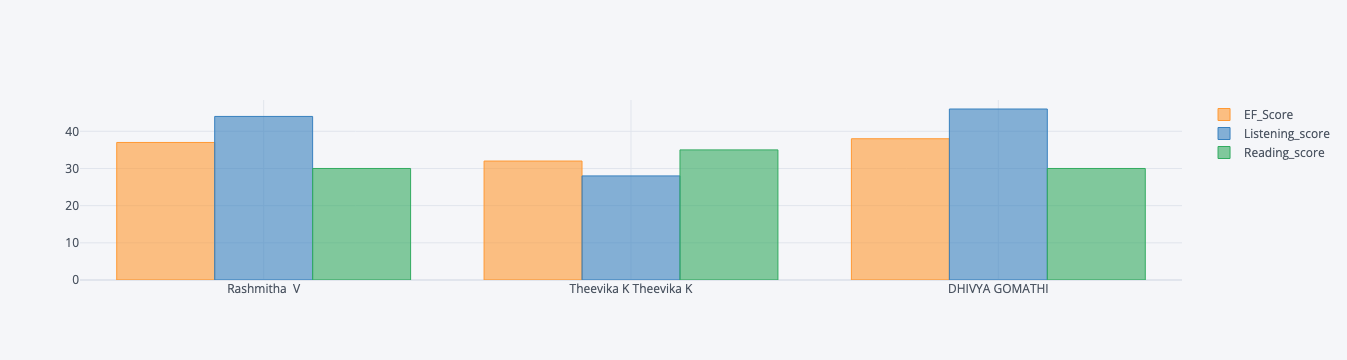

In [36]:
a2 = df[df["CEFR_level"]=="A2"]
a2[["EF_Score","Listening_score","Reading_score"]].iplot(kind='bar')

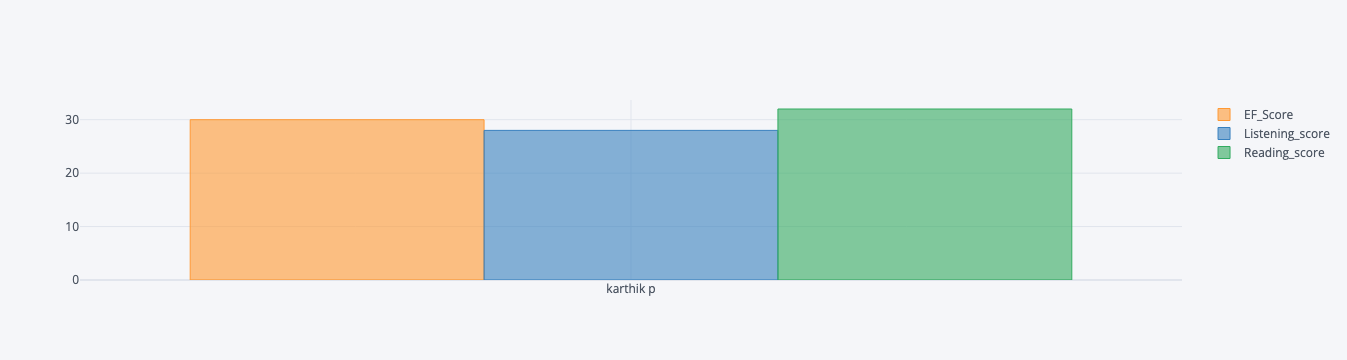

In [37]:
a1 = df[df['CEFR_level']=="A1"]
a1[["EF_Score","Listening_score","Reading_score"]].iplot(kind='bar')

## Let's now see the relationships between the given variables

In [38]:
num = df.select_dtypes(include=["int","float"])
num

,EF_Score,Listening_score,Reading_score,EF_Score_range_pct
Name,,,,
karthik p,30,28,32,3.333333
Rashmitha V,37,44,30,3.333333
Theevika K Theevika K,32,28,35,3.333333
DHIVYA GOMATHI,38,46,30,3.333333
NITHYA R,47,37,57,3.333333
Rajalakshmi Ponraj,49,44,53,3.333333
Harini k,46,44,48,3.333333
Keerthana Arumugam,47,46,47,3.333333
SWATHI V SWATHI V,50,43,57,3.333333


<Axes: >

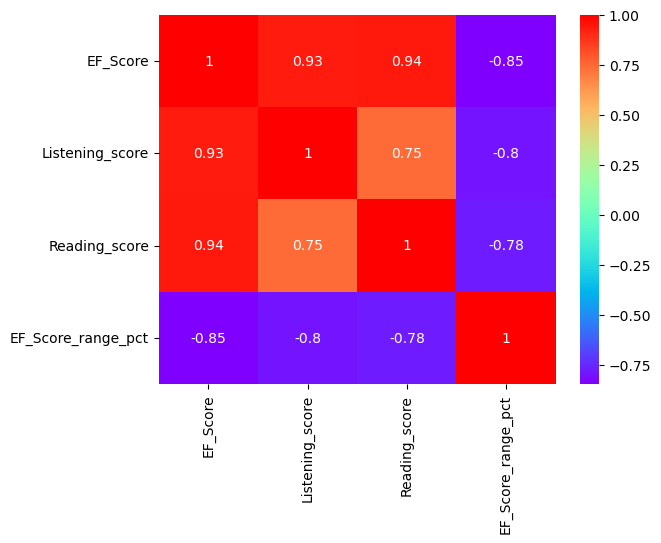

In [39]:
sns.heatmap(num.corr(),cmap="rainbow",annot=True)

/Users/kausik/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



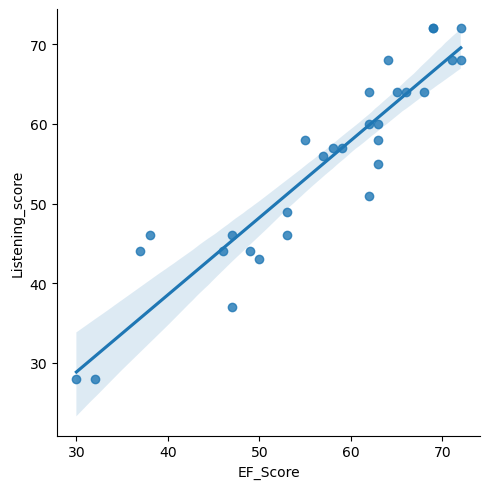

In [40]:
sns.lmplot(x="EF_Score",y="Listening_score",data=num)

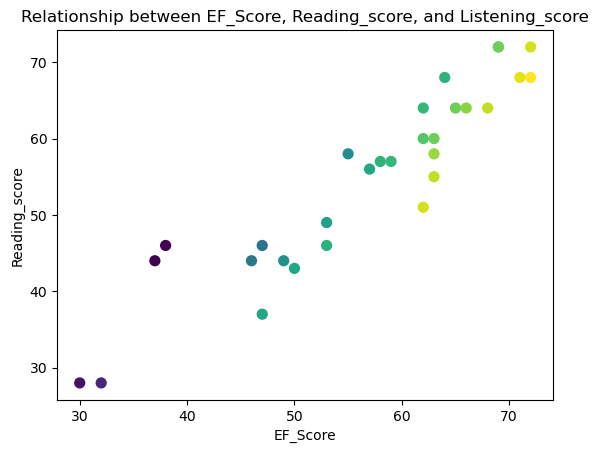

In [41]:
plt.scatter(x="EF_Score", y="Listening_score", c="Reading_score",data=num, s=50)

# Set the labels and title of the figure
plt.xlabel('EF_Score')
plt.ylabel('Reading_score')
plt.title('Relationship between EF_Score, Reading_score, and Listening_score')

# Show the figure
plt.show()

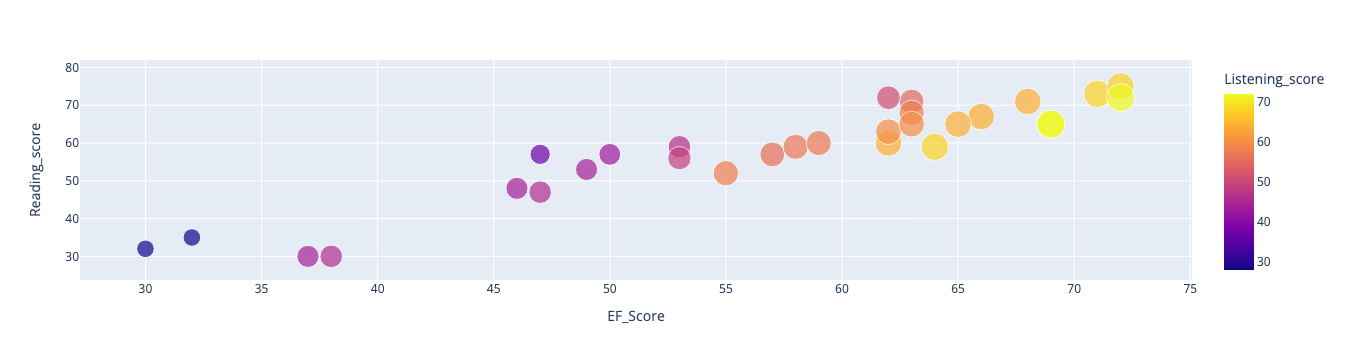

In [42]:
import plotly.express as px
fig = px.scatter(df, x='EF_Score', y='Reading_score', color='Listening_score', size='Listening_score')

# Show the plot
fig.show()

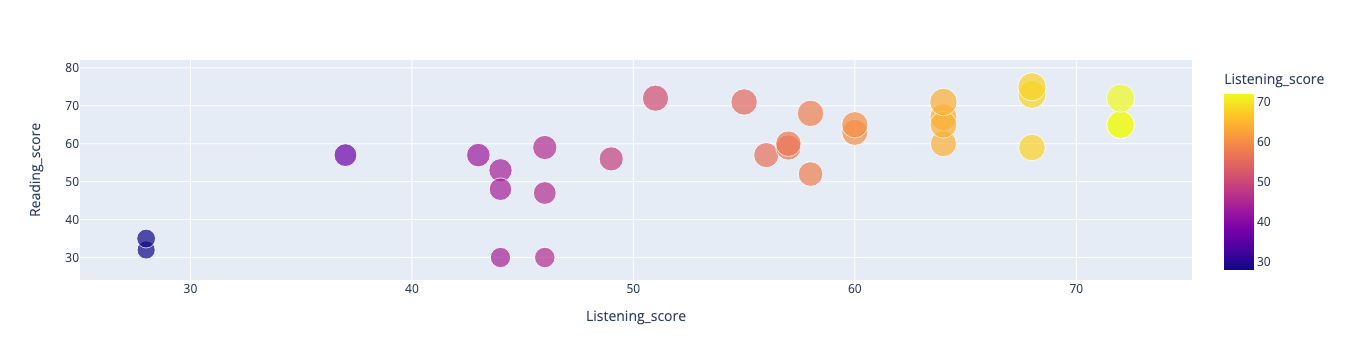

In [43]:
fig = px.scatter(df, x='Listening_score', y='Reading_score', size='EF_Score', color='Listening_score', hover_name=df.index)
fig.update_layout(showlegend=True)

# Show the plot
fig.show()

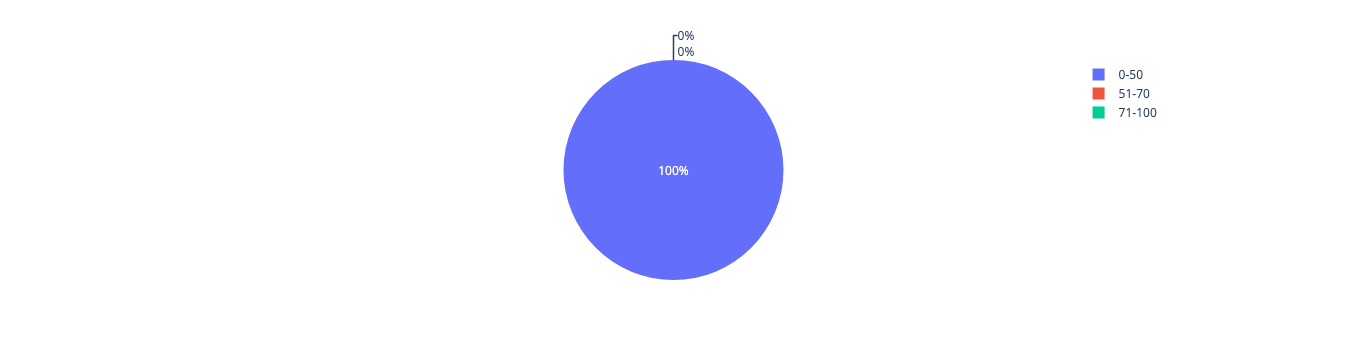

In [44]:
# Create a pie chart
fig = px.pie(df, values='EF_Score_range_pct', names='EF_Score_range')

# Show the plot
fig.show()

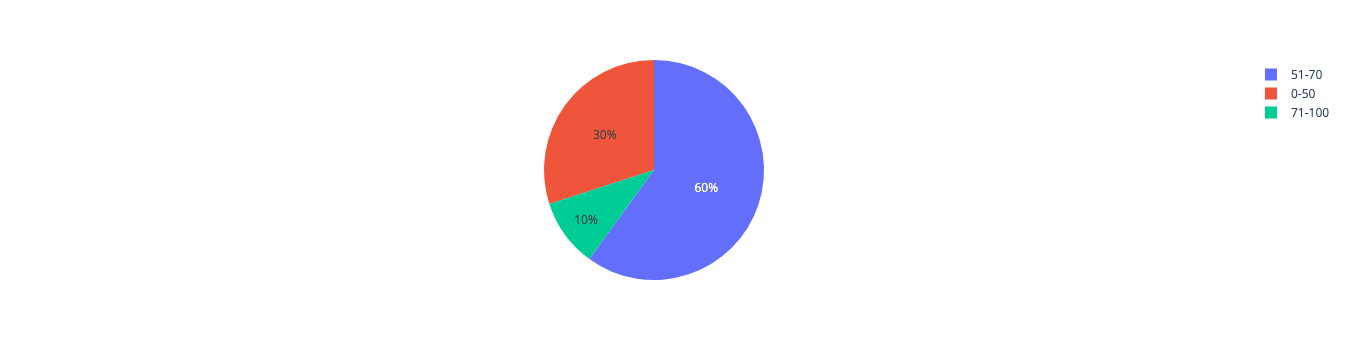

In [45]:
px.pie(df,"EF_Score_range")

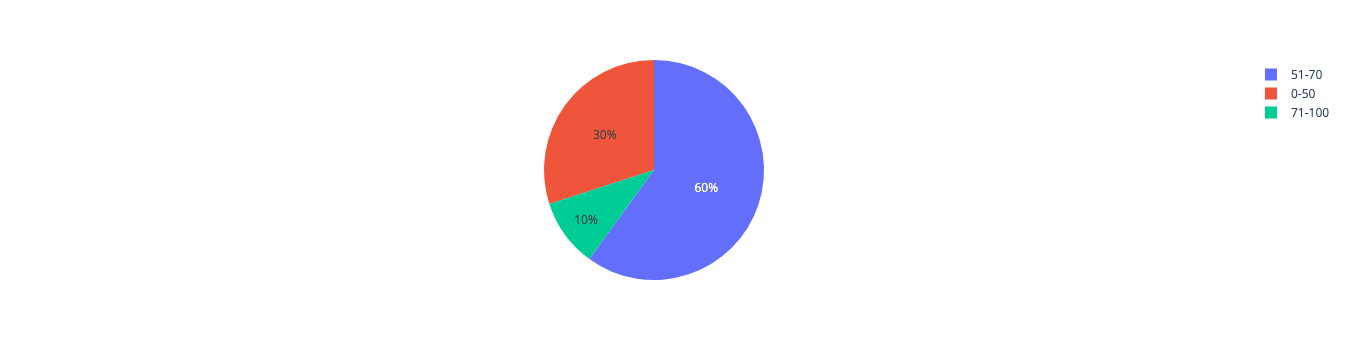

In [49]:
px.pie(df,"EF_Score_range")